In [58]:
import hashlib
import sqlite3
from PIL import Image
import imagehash
import os
import datetime
import pandas as pd
import numpy as np  # Add this import to resolve the error
import matplotlib.pyplot as plt  # You also need to import matplotlib for plotting
import pprint
from IPython.display import display
import seaborn as sns


In [2]:
# Function to load images from a directory
def load_images_from_directory(directory_path):
    images = []
    
    # List all files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        
        # Check if the file is an image (based on file extension)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                # Open the image using Pillow (this is just for loading)
                img = Image.open(file_path)
                images.append(file_path)  # Save the file path instead of the image object
                print(f"Loaded: {filename}")
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    return images


In [3]:
# Function to compute SHA-256 hash for an image
def compute_cryptographic_hash(image_path):
    hash_sha256 = hashlib.sha256()  # Initialize SHA-256 hash object
    
    try:
        # Open the image file in binary mode
        with open(image_path, 'rb') as img_file:
            # Read the image in chunks to avoid memory issues with large files
            while chunk := img_file.read(8192):
                hash_sha256.update(chunk)  # Update the hash with each chunk of data
        
        return hash_sha256.hexdigest()  # Return the hexadecimal representation of the hash
    
    except Exception as e:
        print(f"Error computing hash for {image_path}: {e}")
        return None


In [4]:
# Directory path where images are stored
directory_path = r"C:\\APPU SELVA\\Pongal 2024"

# Load the images from the directory
image_paths = load_images_from_directory(directory_path)


Loaded: 1.JPG
Loaded: 10.JPG
Loaded: 11.JPG
Loaded: 12.JPG
Loaded: 13.JPG
Loaded: 14.JPG
Loaded: 15.JPG
Loaded: 16.JPG
Loaded: 17.JPG
Loaded: 18.JPG
Loaded: 19.JPG
Loaded: 2.JPG
Loaded: 20.JPG
Loaded: 21.JPG
Loaded: 22.JPG
Loaded: 23.JPG
Loaded: 24.JPG
Loaded: 25.JPG
Loaded: 26.JPG
Loaded: 27.JPG
Loaded: 28.JPG
Loaded: 29.jpg
Loaded: 3.JPG
Loaded: 30.jpg
Loaded: 31.jpg
Loaded: 32.jpg
Loaded: 33.jpg
Loaded: 34.jpg
Loaded: 35.jpg
Loaded: 36.jpg
Loaded: 4.JPG
Loaded: 5.JPG
Loaded: 6.JPG
Loaded: 7.JPG
Loaded: 8.JPG
Loaded: 9.JPG


In [5]:
# Compute hash for each image and print
cryptographic_hashes = {}
for image_path in image_paths:
    img_hash = compute_cryptographic_hash(image_path)
    if img_hash:
        cryptographic_hashes[image_path] = img_hash
        print(f"Hash for {image_path}: {img_hash}")

# Example: Display all computed hashes
if cryptographic_hashes:
    print("Image hashes could be computed:")
else:
    print("No images found or hashes could not be computed.")


Hash for C:\\APPU SELVA\\Pongal 2024\1.JPG: 996ce849caeadbf443bb6548328a3bbafca706764781d0ce8b102033ba0be275
Hash for C:\\APPU SELVA\\Pongal 2024\10.JPG: fdbff04aa67fb27a698c05ec5e078c748d179a3a025a6586c5dfa7719405963f
Hash for C:\\APPU SELVA\\Pongal 2024\11.JPG: 47f4c47164bdfee455abeba76a584faf7b93b3d7a8b0d591f49297564fe55550
Hash for C:\\APPU SELVA\\Pongal 2024\12.JPG: 52e2264efc20f30ed22e597fdc101a32abe49ad35caa50b5574f557b57ada2f1
Hash for C:\\APPU SELVA\\Pongal 2024\13.JPG: aeca0dbf151c1ad48aa7614c3e7d43a36f924b0d837279d1708ea08445127c05
Hash for C:\\APPU SELVA\\Pongal 2024\14.JPG: 9d4d09b67c8411da7a4a77e723a066d4132e3d40eb58a889bac735932e290f04
Hash for C:\\APPU SELVA\\Pongal 2024\15.JPG: 9b612ba5621b26555064820bac8122c80049d543f6027763ed65054ffddb34cd
Hash for C:\\APPU SELVA\\Pongal 2024\16.JPG: 35815d19ad24b554dd2468aaba5baec36809b15c787aea8c9c1c005e6078c9fd
Hash for C:\\APPU SELVA\\Pongal 2024\17.JPG: 122ec5b8da7e776e1bbcbd3a42eea8acf1bab317134eeffdaf48881402f904c5
Hash for C:

In [6]:
# Function to compute perceptual hash for an image
def compute_perceptual_hash(image):
    try:
        # Convert image to RGB (in case it's not in RGB format)
        image = image.convert('RGB')
        
        # Compute the perceptual hash using average hash method
        perceptual_hash = imagehash.average_hash(image)
        
        return perceptual_hash
    
    except Exception as e:
        print(f"Error computing perceptual hash: {e}")
        return None


In [7]:
# Print perceptual hashes for all images
perceptual_hashes = {}
for image_path in image_paths:
    try:
        # Open the image using Pillow
        with Image.open(image_path) as img:
            # Compute perceptual hash for the image
            perceptual_hash = compute_perceptual_hash(img)
            if perceptual_hash:
                perceptual_hashes[image_path] = perceptual_hash
                print(f"Perceptual hash for {image_path}: {perceptual_hash}")
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")


Perceptual hash for C:\\APPU SELVA\\Pongal 2024\1.JPG: defefae0c2c1c0cc
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\10.JPG: 860c58f830733074
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\11.JPG: 860c58f830733074
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\12.JPG: ccf0f8fc8c8680c0
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\13.JPG: 004000026f7e1eff
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\14.JPG: 004040026f7e1eff
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\15.JPG: 0040c0023f5e3eff
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\16.JPG: 0040c0023f1e3eff
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\17.JPG: 004080023f1e3eff
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\18.JPG: 008080007e1e3eff
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\19.JPG: 008080804e7e3c7f
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\2.JPG: e2e6ccccc999b818
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\20.JPG: 00006060607efefe
Perceptual hash for C:\\APPU SELVA\\Pongal 2024\21.JP

In [8]:
# Function to create three instances of an image and compute perceptual hashes
def create_image_instances_and_hashes(image, compute_perceptual_hash):
    # Instance 1: Rotate the image by 15 degrees clockwise
    rotation_15degrees_Clockwise = image.rotate(15, resample=Image.NEAREST)
    # Compute perceptual hash for the rotated image
    hash_rotation_15degrees_Clockwise = compute_perceptual_hash(rotation_15degrees_Clockwise)
    
    # Instance 2: Rotate the image by -15 degrees (counter-clockwise)
    rotation_15degrees_CounterClockwise = image.rotate(-15, resample=Image.NEAREST)
    # Compute perceptual hash for the rotated image
    hash_rotation_15degrees_CounterClockwise = compute_perceptual_hash(rotation_15degrees_CounterClockwise)
    
    # Instance 3: Apply a shear transformation with minimal difference
    width, height = image.size
    shear_matrix = (1, 0.05, 0, 0.05, 1, 0)  # Minimal shearing transformation matrix
    Shear_Low_Difference = image.transform((width, height), Image.AFFINE, shear_matrix, resample=Image.NEAREST)
    # Compute perceptual hash for the sheared image
    hash_Shear_Low_Difference = compute_perceptual_hash(Shear_Low_Difference)
    
    return {
        "rotation_15degrees_Clockwise": hash_rotation_15degrees_Clockwise,
        "rotation_15degrees_CounterClockwise": hash_rotation_15degrees_CounterClockwise,
        "Shear_Low_Difference": hash_Shear_Low_Difference
    }


In [9]:
# Create an empty list to store the data for the table
hash_table_data = []

# Loop through each image and compute the perceptual hashes for its instances
for image_path in image_paths:
    with Image.open(image_path) as img:
        # Create the instances and compute perceptual hashes
        image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
        
        # Add the data to the table
        hash_table_data.append({
            "FileName": image_path,
            "Perceptual HashValue_rotation_15degrees_Clockwise": image_hashes["rotation_15degrees_Clockwise"],
            "Perceptual HashValue_rotation_15degrees_CounterClockwise": image_hashes["rotation_15degrees_CounterClockwise"],
            "Perceptual HashValue_Shear_Low_Difference": image_hashes["Shear_Low_Difference"]
        })

# Convert the data into a pandas DataFrame for easy viewing
df = pd.DataFrame(hash_table_data)

# Display the table
df


,FileName,Perceptual HashValue_rotation_15degrees_Clockwise,Perceptual HashValue_rotation_15degrees_CounterClockwise,Perceptual HashValue_Shear_Low_Difference
0,C:\\APPU SELVA\\Pongal 2024\1.JPG,1e7ef0e3e1e1e660,787effe3c0c2c20a,fefee0e0c2c0c4c0
1,C:\\APPU SELVA\\Pongal 2024\10.JPG,0e1818f8f3307a38,00667d3870707222,8708d8f032f37060
2,C:\\APPU SELVA\\Pongal 2024\11.JPG,0e0818f8f3307a38,00667d3870707222,8608d8f030723060
3,C:\\APPU SELVA\\Pongal 2024\12.JPG,08e0f8fce680c0c0,7474f89c8c8c4402,e0f8f8ec8c8280c0
4,C:\\APPU SELVA\\Pongal 2024\13.JPG,0000c3c70f7f7f3c,606000406eff7e3e,004000074f7e3fbc
5,C:\\APPU SELVA\\Pongal 2024\14.JPG,0000c3c70f7f7f3c,606000406eff7e3e,004000074f7e3fbc
6,C:\\APPU SELVA\\Pongal 2024\15.JPG,0000c2c79e3f1f3c,404000607ebefe3c,0040c0067e1e3efc
7,C:\\APPU SELVA\\Pongal 2024\16.JPG,0000c2c77e3f1f3c,404000607ebefe3c,004080067e1e3efc
8,C:\\APPU SELVA\\Pongal 2024\17.JPG,000082873e3f1f3c,404000605ebe7e3c,004080067e1e3ffe
9,C:\\APPU SELVA\\Pongal 2024\18.JPG,000080869e7e1f3c,404000603ebefe3c,008080067e3c7efc


In [22]:
def initialize_db(db_name):
    # Connect to the SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect(db_name)
    c = conn.cursor()
    
    # Create a table for storing image metadata
    c.execute('''
    CREATE TABLE IF NOT EXISTS image_metadata (
        ID INTEGER PRIMARY KEY,
        Filename TEXT,
        Cryptographic_Hash TEXT,
        Perceptual_Hash TEXT,
        File_Location TEXT,
        File_Size INTEGER,
        Image_Width INTEGER,
        Image_Height INTEGER,
        File_Creation_Date TEXT,
        File_Extension TEXT,
        Perceptual_Hash_rotation_15degrees_Clockwise TEXT,
        Perceptual_Hash_rotation_15degrees_CounterClockwise TEXT,
        Perceptual_Hash_Shear_Low_Difference TEXT
    )
    ''')
    
    # Commit changes and return the connection
    conn.commit()
    return conn

# Function to insert image metadata into the database
def insert_image_metadata(conn, idx, filename, cryptographic_hash, perceptual_hash, file_location, file_size, width, height, creation_date, extension, ph_rot_15deg_cw, ph_rot_15deg_ccw, ph_shear_ld):
    c = conn.cursor()
    
    # Insert the metadata into the database
    c.execute('''
    INSERT INTO image_metadata (
        ID, Filename, Cryptographic_Hash, Perceptual_Hash, File_Location, File_Size, 
        Image_Width, Image_Height, File_Creation_Date, File_Extension, 
        Perceptual_Hash_rotation_15degrees_Clockwise, 
        Perceptual_Hash_rotation_15degrees_CounterClockwise, 
        Perceptual_Hash_Shear_Low_Difference
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (idx, filename, cryptographic_hash, perceptual_hash, file_location, file_size, 
          width, height, creation_date, extension, 
          ph_rot_15deg_cw, ph_rot_15deg_ccw, ph_shear_ld))
    
    # Commit changes
    conn.commit()

# Initialize the database
db_name = 'image_metadata.db'
conn = initialize_db(db_name)

# Loop through the loaded images and insert their metadata into the database
if not image_paths:  # Check for empty image paths
    print("No images to process for database insertion.")
else:
    idx = 1  # Starting index for the ID column
    for image_path in image_paths:
        try:
            # Open the image to get the required details
            with Image.open(image_path) as img:
                # Retrieve the cryptographic hash from Cell 4
                cryptographic_hash = cryptographic_hashes.get(image_path, 'NA')
                
                # Retrieve the perceptual hash from Cell 6 and convert to string
                perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))
                
                # Retrieve perceptual hash values for transformed instances (Cell 8) and convert to string
                image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
                ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'N/A'))
                ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'N/A'))
                ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'N/A'))
                
                # Retrieve file metadata
                file_location = os.path.abspath(image_path)
                file_size = os.path.getsize(image_path)
                width, height = img.size
                creation_date = datetime.datetime.fromtimestamp(os.path.getctime(image_path)).strftime('%Y-%m-%d %H:%M:%S')
                file_extension = os.path.splitext(image_path)[1].lower()
                
                # Insert the metadata into the database
                insert_image_metadata(conn, idx, os.path.basename(image_path), cryptographic_hash, perceptual_hash, 
                                      file_location, file_size, width, height, creation_date, file_extension, 
                                      ph_rot_15deg_cw, ph_rot_15deg_ccw, ph_shear_ld)
                
                print(f"Inserted metadata for {image_path} into database.")
                idx += 1  # Increment index for each image
        
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

# Close the connection when done
conn.close()


Inserted metadata for C:\\APPU SELVA\\Pongal 2024\1.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\10.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\11.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\12.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\13.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\14.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\15.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\16.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\17.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\18.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\19.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\2.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\20.JPG into database.
Inserted metadata for C:\\APPU SELVA\\Pongal 2024\21.JPG into data

In [24]:
def export_db_to_excel(db_name, excel_file_name):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_name)
    
    # Query all data from the table
    query = "SELECT * FROM image_metadata"
    df = pd.read_sql_query(query, conn)
    
    # Export to Excel
    excel_file_path = f"{excel_file_name}.xlsx"
    df.to_excel(excel_file_path, index=False)
    conn.close()
    
    print(f"Database exported successfully to {excel_file_path}")
    return excel_file_path

# Export the database to an Excel file
db_name = 'image_metadata.db'
excel_file_name = 'image_metadata_export'
excel_file_path = export_db_to_excel(db_name, excel_file_name)


Database exported successfully to image_metadata_export.xlsx


In [26]:
# # Dictionary to store perceptual hash data
# perceptual_hash_data = {}

# # Loop through images and populate the dictionary
# for image_path in image_paths:
#     try:
#         # Retrieve the cryptographic hash
#         cryptographic_hash = cryptographic_hashes.get(image_path, 'NA')
        
#         # Retrieve the perceptual hash
#         perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))
        
#         # Retrieve transformed perceptual hashes
#         with Image.open(image_path) as img:
#             image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
#             ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'N/A'))
#             ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'N/A'))
#             ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'N/A'))
        
#         # Store the data in the dictionary
#         perceptual_hash_data[cryptographic_hash] = {
#             "Perceptual_Hash": perceptual_hash,
#             "Perceptual_Hash_rotation_15degrees_Clockwise": ph_rot_15deg_cw,
#             "Perceptual_Hash_rotation_15degrees_CounterClockwise": ph_rot_15deg_ccw,
#             "Perceptual_Hash_Shear_Low_Difference": ph_shear_ld
#         }
        
#         print(f"Stored perceptual hash data for {image_path}.")
#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")

# # Display the resulting dictionary
# print("Perceptual Hash Data Dictionary:")
# print(perceptual_hash_data)


Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\1.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\10.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\11.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\12.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\13.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\14.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\15.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\16.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\17.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\18.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\19.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\2.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\20.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Pongal 2024\21.JPG.
Stored perceptual hash data for C:\\APPU SELVA\\Po

In [30]:
# Dictionary to store perceptual hash data
perceptual_hash_data = {}

# Loop through images and populate the dictionary
for image_path in image_paths:
    try:
        # Use the filename as the primary key (you can extract it from the image_path)
        filename = image_path.split("\\")[-1]  # Extracts the filename from the path
        
        # Retrieve the  perceptual hash
        
        perceptual_hash = str(perceptual_hashes.get(image_path, 'NA'))
        
        # Retrieve transformed perceptual hashes
        with Image.open(image_path) as img:
            image_hashes = create_image_instances_and_hashes(img, compute_perceptual_hash)
            ph_rot_15deg_cw = str(image_hashes.get("rotation_15degrees_Clockwise", 'N/A'))
            ph_rot_15deg_ccw = str(image_hashes.get("rotation_15degrees_CounterClockwise", 'N/A'))
            ph_shear_ld = str(image_hashes.get("Shear_Low_Difference", 'N/A'))
        
        # Store the data in the dictionary, using the filename as the key
        perceptual_hash_data[filename] = {
            "Perceptual_Hash": perceptual_hash,
            "Perceptual_Hash_rotation_15degrees_Clockwise": ph_rot_15deg_cw,
            "Perceptual_Hash_rotation_15degrees_CounterClockwise": ph_rot_15deg_ccw,
            "Perceptual_Hash_Shear_Low_Difference": ph_shear_ld
        }
        
        print(f"Stored perceptual hash data for {filename}.")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

# Display the resulting dictionary
print("Perceptual Hash Data Dictionary:")
print(perceptual_hash_data)


Stored perceptual hash data for 1.JPG.
Stored perceptual hash data for 10.JPG.
Stored perceptual hash data for 11.JPG.
Stored perceptual hash data for 12.JPG.
Stored perceptual hash data for 13.JPG.
Stored perceptual hash data for 14.JPG.
Stored perceptual hash data for 15.JPG.
Stored perceptual hash data for 16.JPG.
Stored perceptual hash data for 17.JPG.
Stored perceptual hash data for 18.JPG.
Stored perceptual hash data for 19.JPG.
Stored perceptual hash data for 2.JPG.
Stored perceptual hash data for 20.JPG.
Stored perceptual hash data for 21.JPG.
Stored perceptual hash data for 22.JPG.
Stored perceptual hash data for 23.JPG.
Stored perceptual hash data for 24.JPG.
Stored perceptual hash data for 25.JPG.
Stored perceptual hash data for 26.JPG.
Stored perceptual hash data for 27.JPG.
Stored perceptual hash data for 28.JPG.
Stored perceptual hash data for 29.jpg.
Stored perceptual hash data for 3.JPG.
Stored perceptual hash data for 30.jpg.
Stored perceptual hash data for 31.jpg.
Sto

In [32]:
# Function to calculate Hamming distance
def calculate_hamming_distance(hash1, hash2):
    return hash1 - hash2  # Replace with actual logic for Hamming distance

# Function to compute pairwise Hamming distance for all images
def compute_pairwise_hamming_distances(perceptual_hash_data):
    pairwise_distances = {}

    # Get a list of filenames (keys) in the dictionary
    filenames = list(perceptual_hash_data.keys())
    
    # Iterate through each pair of images
    for i in range(len(filenames)):
        for j in range(i + 1, len(filenames)):
            image_A = filenames[i]
            image_B = filenames[j]
            
            # Extract perceptual hash values for image A and B
            ph_A = perceptual_hash_data[image_A]
            ph_B = perceptual_hash_data[image_B]
            
            # List of perceptual hashes for image A and image B
            ph_A_values = [
                imagehash.hex_to_hash(ph_A["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            ph_B_values = [
                imagehash.hex_to_hash(ph_B["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            # Compute pairwise Hamming distances between A and B's perceptual hashes
            min_distance = float('inf')  # Start with a large value
            
            # Compute all pairwise distances between A and B's perceptual hashes
            for ph_A_value in ph_A_values:
                for ph_B_value in ph_B_values:
                    distance = calculate_hamming_distance(ph_A_value, ph_B_value)
                    min_distance = min(min_distance, distance)
            
            # Store the minimum distance for the current pair of images
            pairwise_distances[(image_A, image_B)] = min_distance

    return pairwise_distances

# Compute pairwise Hamming distances
pairwise_hamming_distances = compute_pairwise_hamming_distances(perceptual_hash_data)

# Display the pairwise Hamming distances
print("Pairwise Hamming Distances:")
for (image_A, image_B), min_distance in pairwise_hamming_distances.items():
    print(f"Minimum Hamming Distance between {image_A} and {image_B}: {min_distance}")


Pairwise Hamming Distances:
Minimum Hamming Distance between 1.JPG and 10.JPG: 25
Minimum Hamming Distance between 1.JPG and 11.JPG: 26
Minimum Hamming Distance between 1.JPG and 12.JPG: 18
Minimum Hamming Distance between 1.JPG and 13.JPG: 35
Minimum Hamming Distance between 1.JPG and 14.JPG: 35
Minimum Hamming Distance between 1.JPG and 15.JPG: 35
Minimum Hamming Distance between 1.JPG and 16.JPG: 35
Minimum Hamming Distance between 1.JPG and 17.JPG: 37
Minimum Hamming Distance between 1.JPG and 18.JPG: 36
Minimum Hamming Distance between 1.JPG and 19.JPG: 36
Minimum Hamming Distance between 1.JPG and 2.JPG: 24
Minimum Hamming Distance between 1.JPG and 20.JPG: 24
Minimum Hamming Distance between 1.JPG and 21.JPG: 29
Minimum Hamming Distance between 1.JPG and 22.JPG: 29
Minimum Hamming Distance between 1.JPG and 23.JPG: 34
Minimum Hamming Distance between 1.JPG and 24.JPG: 34
Minimum Hamming Distance between 1.JPG and 25.JPG: 36
Minimum Hamming Distance between 1.JPG and 26.JPG: 36
M

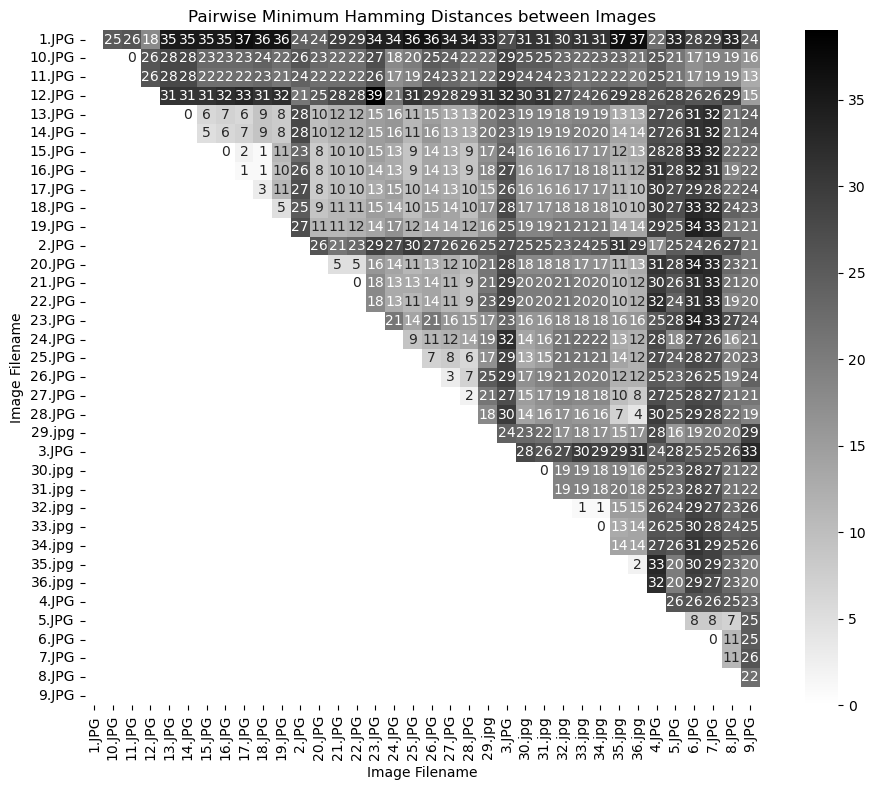

In [60]:
# Function to calculate Hamming distance (same as before)
def calculate_hamming_distance(hash1, hash2):
    return hash1 - hash2  # Replace with actual logic for Hamming distance

# Function to compute pairwise Hamming distance for all images (full matrix)
def compute_pairwise_hamming_distances(perceptual_hash_data):
    pairwise_distances = {}

    # Get a list of filenames (keys) in the dictionary
    filenames = list(perceptual_hash_data.keys())
    
    # Initialize a distance matrix
    distance_matrix = np.zeros((len(filenames), len(filenames)))
    
    # Iterate through each pair of images and compute distances
    for i in range(len(filenames)):
        for j in range(i + 1, len(filenames)):
            image_A = filenames[i]
            image_B = filenames[j]
            
            # Extract perceptual hash values for image A and B
            ph_A = perceptual_hash_data[image_A]
            ph_B = perceptual_hash_data[image_B]
            
            # List of perceptual hashes for image A and image B
            ph_A_values = [
                imagehash.hex_to_hash(ph_A["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_A["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            ph_B_values = [
                imagehash.hex_to_hash(ph_B["Perceptual_Hash"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_Clockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_rotation_15degrees_CounterClockwise"]),
                imagehash.hex_to_hash(ph_B["Perceptual_Hash_Shear_Low_Difference"])
            ]
            
            # Compute pairwise Hamming distances between A and B's perceptual hashes
            min_distance = float('inf')  # Start with a large value
            
            # Compute all pairwise distances between A and B's perceptual hashes
            for ph_A_value in ph_A_values:
                for ph_B_value in ph_B_values:
                    distance = calculate_hamming_distance(ph_A_value, ph_B_value)
                    min_distance = min(min_distance, distance)
            
            # Store the minimum distance for the current pair of images in the distance matrix
            distance_matrix[i, j] = min_distance
            distance_matrix[j, i] = min_distance  # Matrix is symmetric

    return filenames, distance_matrix

# Compute pairwise Hamming distances
filenames, pairwise_hamming_distances = compute_pairwise_hamming_distances(perceptual_hash_data)

# Mask the lower triangular part of the matrix (set NaN for lower triangle)
mask_lower = np.tril(np.ones_like(pairwise_hamming_distances, dtype=bool), k=0)  # Mask lower triangle
pairwise_hamming_distances[mask_lower] = np.nan  # Set lower triangle to NaN (no annotation)

# Plot the distance matrix as a heatmap with binary color map
plt.figure(figsize=(10, 8))

# Set the color map to 'binary' and annotate only for the lower triangle
sns.heatmap(pairwise_hamming_distances, 
            xticklabels=filenames, 
            yticklabels=filenames, 
            cmap="binary", 
            annot=True, 
            annot_kws={'size': 10}, 
            cbar=True, 
            mask=mask_lower, 
            square=True)

# Adding labels and title
plt.title("Pairwise Minimum Hamming Distances between Images")
plt.xlabel("Image Filename")
plt.ylabel("Image Filename")

# Show the plot
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
